In [10]:
from analysis_src.data_review import SetStrategy, InfoReview, DescribeReview, MissingValuesReview
from analysis_src.univariate_review import SetUnivariateStrategy, NumericalReview, CategoricalReview
import numpy as np
import pandas as pd
from analysis_src.multivariate_review import SetMultivariateStrategy, CorrelationReview, PairPlotReview,OutlierReview
from analysis_src.bivariate_review import SetBivariateStrategy, Numerical_CategoricalReview, Numerical_NumericalReview,Categorical_CategoricalReview


In [2]:
data_path = "../data/insurance.csv"
df = pd.read_csv(data_path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
reviewer = SetStrategy(InfoReview())
reviewer.execute_strategy(df)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
reviewer.set_strategy(DescribeReview())
reviewer.execute_strategy(df)

Data Description (Numerical Columns):
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Data Description (Categorical Columns):
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [5]:
reviewer.set_strategy(MissingValuesReview())
reviewer.execute_strategy(df)

Missing Values:
Series([], dtype: int64)


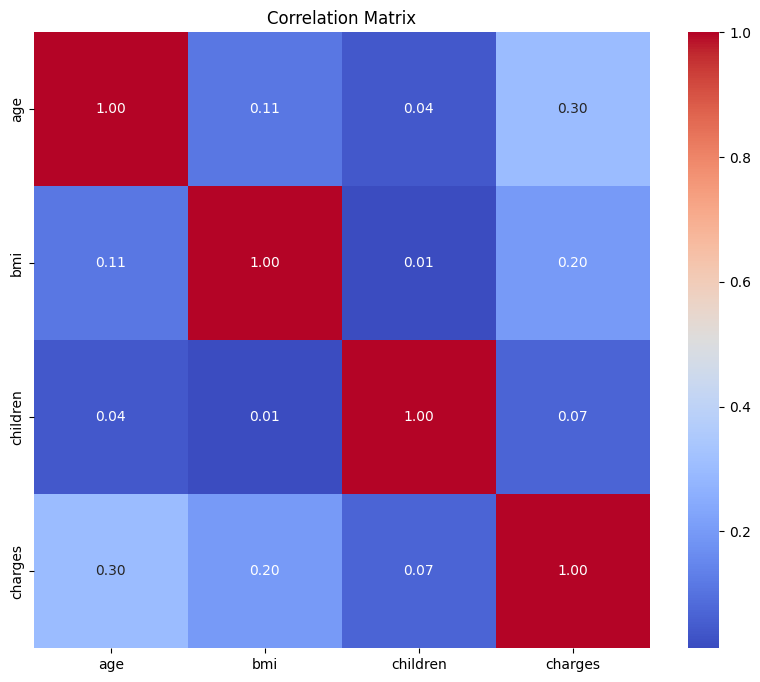

In [6]:
reviewer = SetMultivariateStrategy(CorrelationReview())
reviewer.execute_strategy(df)


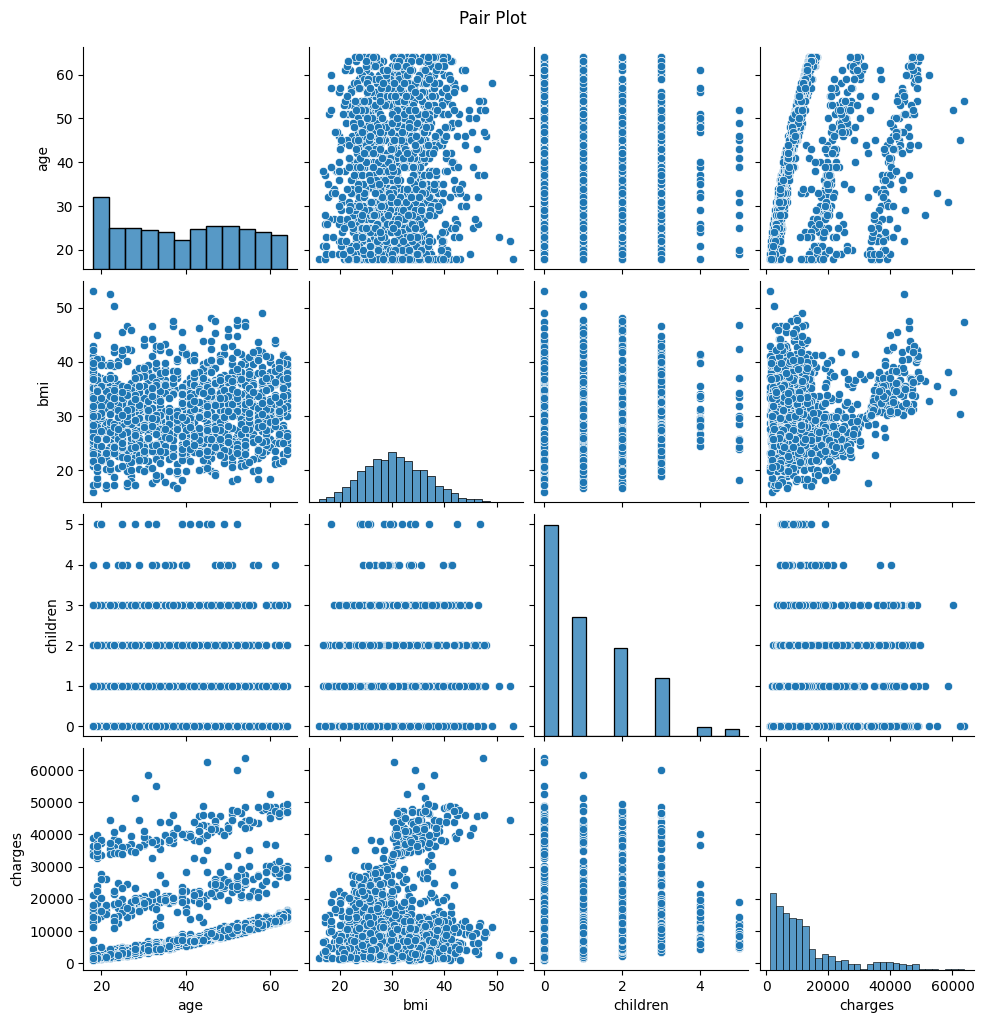

In [7]:
reviewer.set_strategy(PairPlotReview())
reviewer.execute_strategy(df)

In [8]:
reviewer.set_strategy(OutlierReview())
reviewer.execute_strategy(df)

Outlier Percentage in age: 0.00%
Outlier Percentage in bmi: 0.67%
Outlier Percentage in children: 0.00%
Outlier Percentage in charges: 10.39%


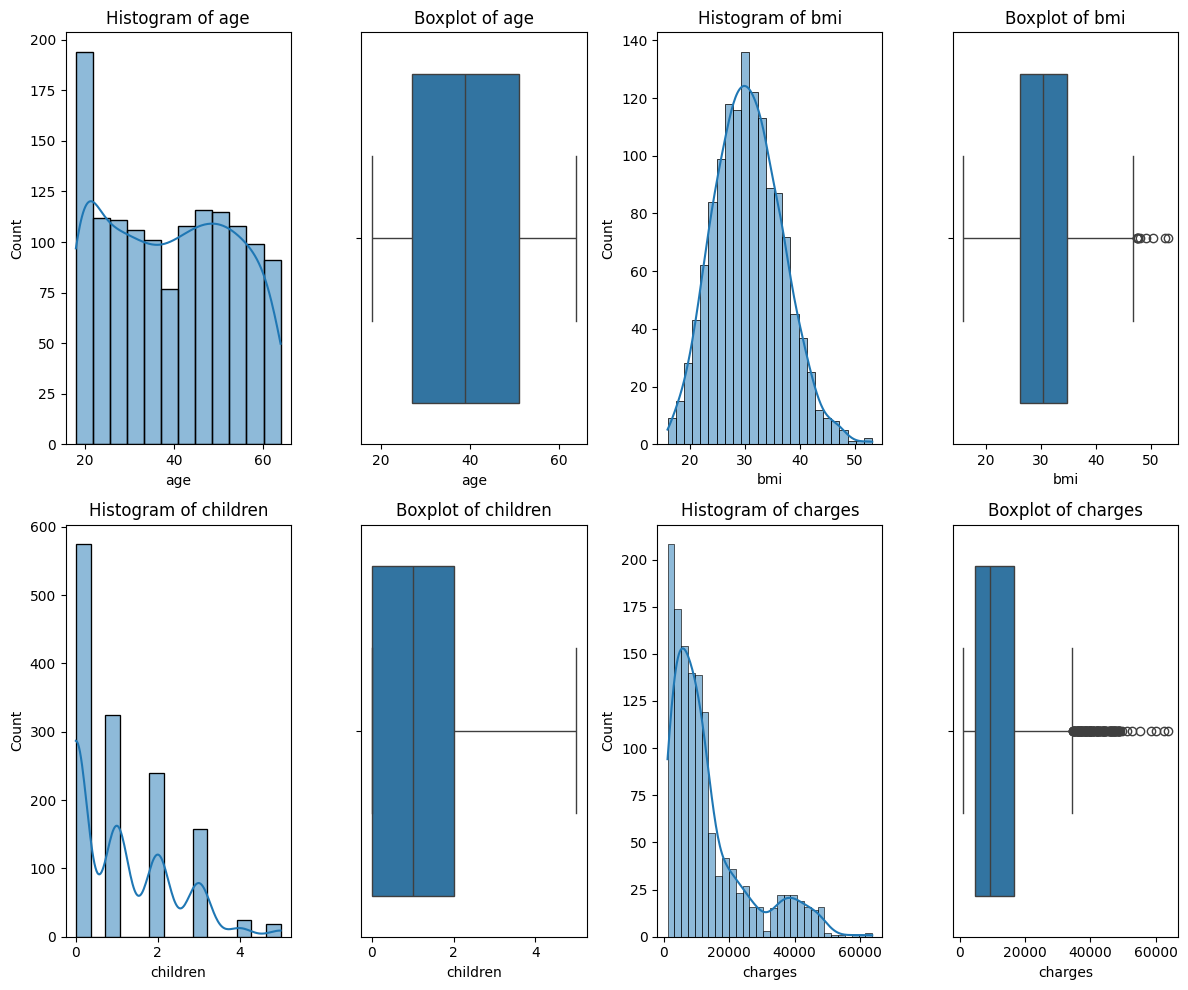

In [9]:
reviewer = SetUnivariateStrategy(NumericalReview(show_all=True))
reviewer.execute_strategy(df)

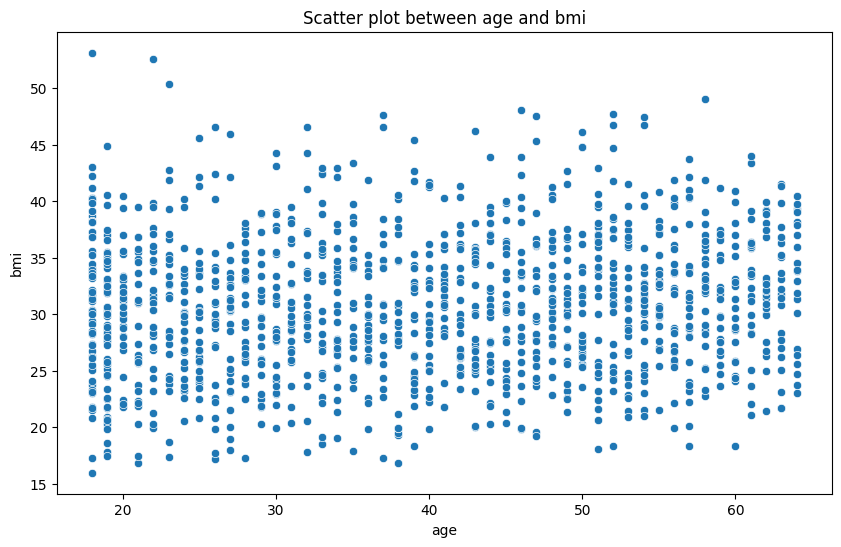

In [16]:
reviewer = SetBivariateStrategy(Numerical_NumericalReview())
reviewer.execute_strategy(df,'age','bmi')

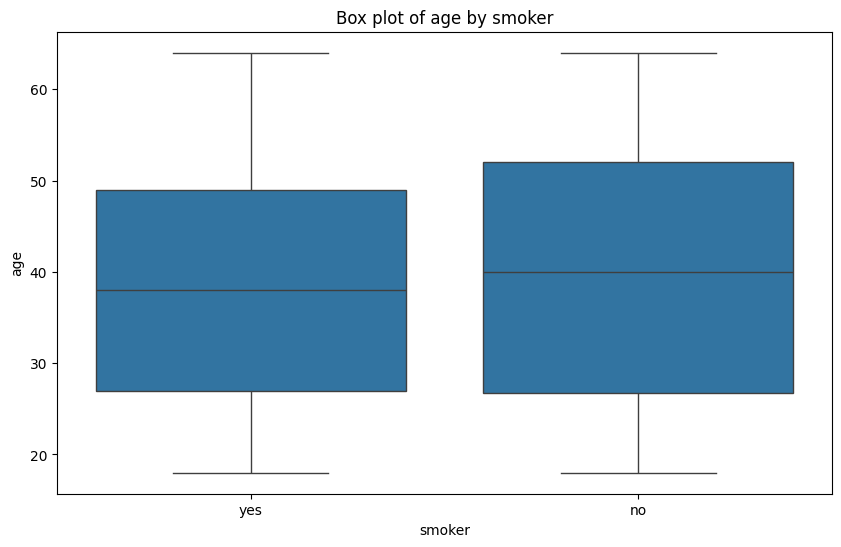

In [17]:
reviewer.set_strategy(Numerical_CategoricalReview())
reviewer.execute_strategy(df,'age','smoker')

Contingency Table:
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


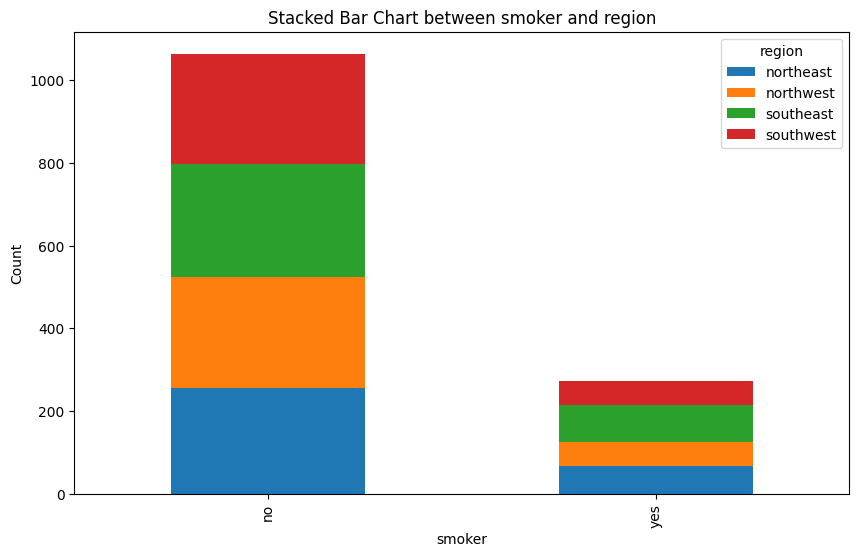

In [18]:
reviewer.set_strategy(Categorical_CategoricalReview())
reviewer.execute_strategy(df,'smoker','region')